Silakan pilih file CSV...


Saving Social_Network_Ads.csv to Social_Network_Ads (4).csv
Kernel: linear
Confusion Matrix:
[[61  2]
 [12 25]]
F1 Score: 0.7812
------------------------------
Kernel: poly
Confusion Matrix:
[[63  0]
 [15 22]]
F1 Score: 0.7458
------------------------------
Kernel: sigmoid
Confusion Matrix:
[[50 13]
 [16 21]]
F1 Score: 0.5915
------------------------------
Kernel: rbf
Confusion Matrix:
[[57  6]
 [ 1 36]]
F1 Score: 0.9114
------------------------------
Kernel terbaik adalah 'rbf' dengan F1 Score: 0.9114


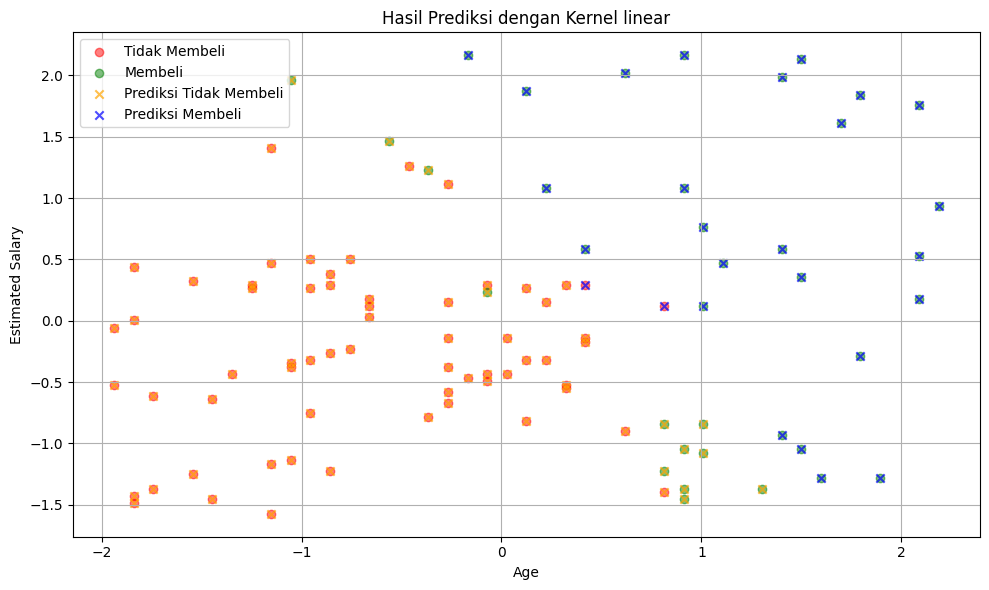

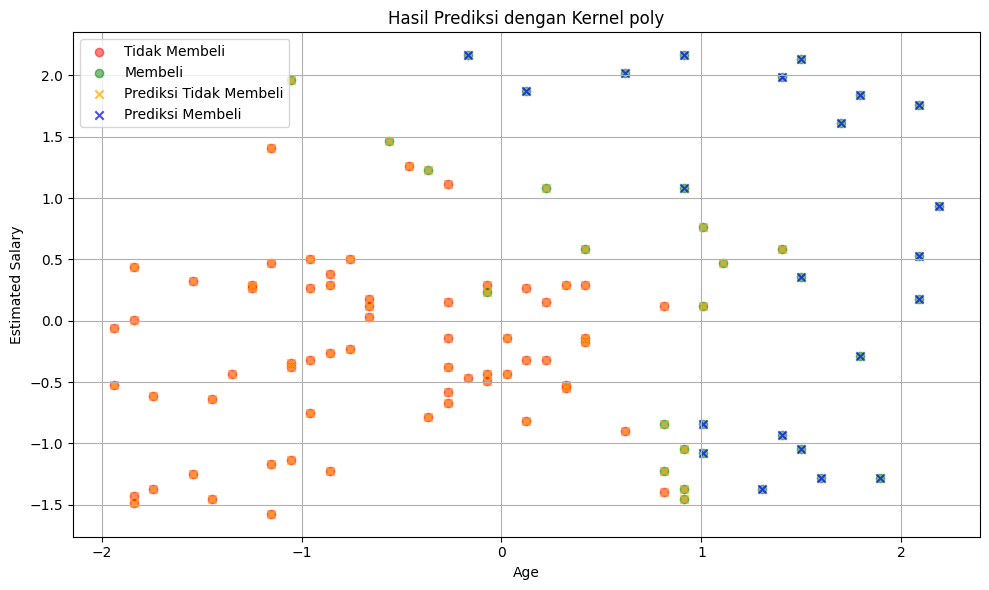

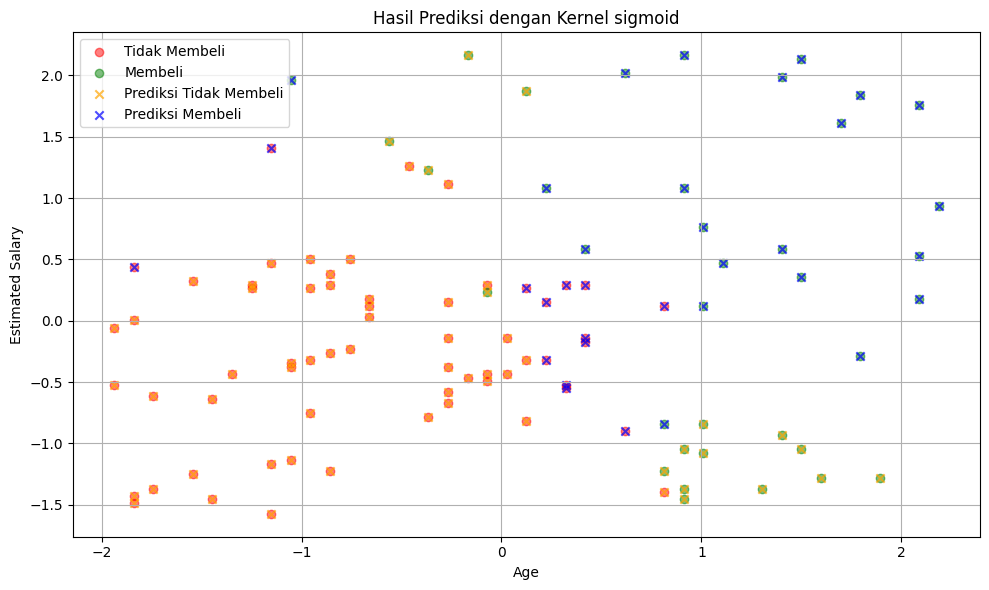

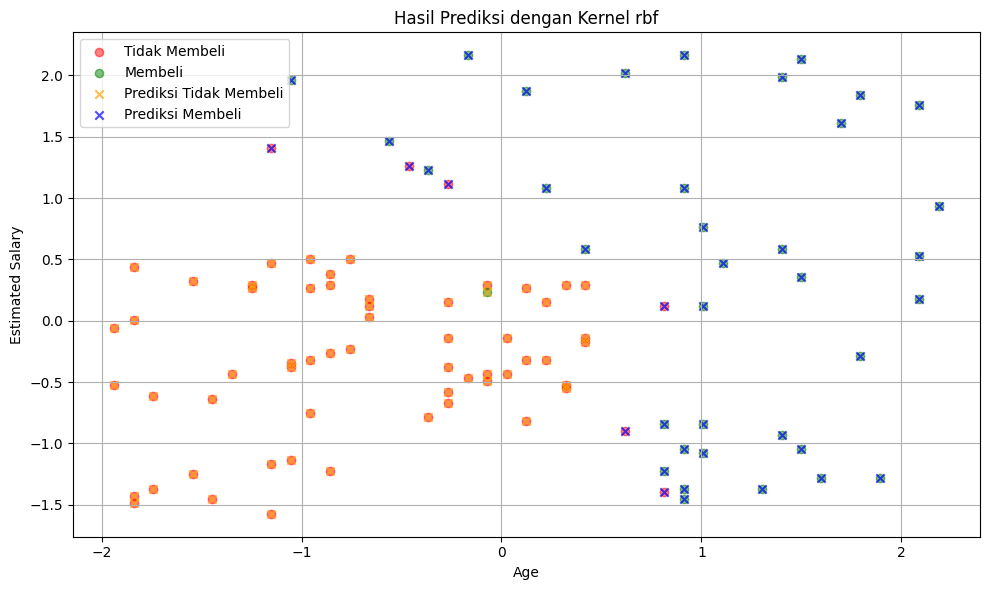

In [7]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
import io
import os
import matplotlib.pyplot as plt

# 1. Upload file menggunakan dialog file (Google Colab) atau dialog file browser
try:
    from google.colab import files
    print("Silakan pilih file CSV...")
    uploaded = files.upload()
    file_path = next(iter(uploaded))  # Ambil nama file dari uploaded
    data = pd.read_csv(io.BytesIO(uploaded[file_path]))  # Baca data dari BytesIO
except ImportError:
    # Jika tidak di Google Colab, gunakan dialog file berbasis browser
    import tkinter as tk
    from tkinter import filedialog

    root = tk.Tk()
    root.withdraw()  # Sembunyikan jendela utama Tkinter
    file_path = filedialog.askopenfilename(title="Pilih file CSV", filetypes=[("CSV Files", "*.csv")])

    if not file_path:
        print("Tidak ada file yang dipilih. Program dihentikan.")
        exit()

    data = pd.read_csv(file_path)

# 2. Memisahkan fitur (X) dan target (y)
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# 3. Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4. Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Membuat model SVM dengan berbagai kernel dan menyimpan hasil prediksi
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
models = {}
results = {}
predictions = {}

for kernel in kernels:
    # Membuat dan melatih model SVM dengan kernel tertentu
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    models[kernel] = model

    # Melakukan prediksi pada data testing
    y_pred = model.predict(X_test)

    # Menyimpan hasil prediksi untuk visualisasi
    predictions[kernel] = y_pred

    # Menghitung confusion matrix dan F1 score
    conf_matrix = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Menyimpan hasil evaluasi
    results[kernel] = {
        'Confusion Matrix': conf_matrix,
        'F1 Score': f1
    }

# 6. Menampilkan hasil evaluasi setiap kernel
for kernel in kernels:
    print(f"Kernel: {kernel}")
    print(f"Confusion Matrix:\n{results[kernel]['Confusion Matrix']}")
    print(f"F1 Score: {results[kernel]['F1 Score']:.4f}") # Changed 'F Score' to 'F1 Score'
    print("-" * 30)

# 7. Menentukan kernel terbaik berdasarkan F1 Score
best_kernel = max(results, key=lambda k: results[k]['F1 Score'])
print(f"Kernel terbaik adalah '{best_kernel}' dengan F1 Score: {results[best_kernel]['F1 Score']:.4f}")

# 8. Visualisasi hasil prediksi untuk setiap kernel
for kernel in kernels:
    plt.figure(figsize=(10, 6))

    # Scatter plot untuk data asli dan prediksi
    plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Tidak Membeli', alpha=0.5)
    plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='green', label='Membeli', alpha=0.5)

    # Scatter plot untuk hasil prediksi
    plt.scatter(X_test[predictions[kernel] == 0][:, 0], X_test[predictions[kernel] == 0][:, 1],
                color='orange', marker='x', label='Prediksi Tidak Membeli', alpha=0.7)

    plt.scatter(X_test[predictions[kernel] == 1][:, 0], X_test[predictions[kernel] == 1][:, 1],
                color='blue', marker='x', label='Prediksi Membeli', alpha=0.7)

    plt.title(f'Hasil Prediksi dengan Kernel {kernel}')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


1. Kernel Linear
Garis Pemisah: Model linear mencoba untuk menarik garis lurus yang memisahkan dua kelas (membeli atau tidak membeli).

Akurasi: Mungkin tidak terlalu akurat jika data tidak terdistribusi secara linear. Dalam grafik, kita akan melihat bahwa titik-titik oranye dan biru (hasil prediksi) mungkin tumpang tindih dengan titik-titik merah dan hijau (data aktual).

Underfitting: Jika garis pemisah terlalu sederhana, model mungkin kurang sesuai (underfitting), yang berarti model tidak menangkap kompleksitas data.

2. Kernel Poly (Polinomial)
Bentuk Pemisah: Model polinomial menggunakan kurva atau batas yang lebih kompleks untuk memisahkan kelas-kelas. Parameter degree menentukan kompleksitas kurva (misalnya, degree=3 untuk kurva kubik).

Fleksibilitas: Lebih fleksibel daripada kernel linear, sehingga dapat menangkap pola yang lebih kompleks dalam data.

Overfitting: Jika degree terlalu tinggi, model dapat overfitting, yang berarti model terlalu cocok dengan data training dan tidak menggeneralisasi dengan baik ke data testing.

3. Kernel Sigmoid
Fungsi Sigmoid: Kernel ini menggunakan fungsi sigmoid, yang mirip dengan jaringan saraf tiruan dua lapis.

Karakteristik: Seringkali menghasilkan performa yang kurang baik dibandingkan dengan kernel lainnya, terutama jika data tidak cocok untuk dipisahkan dengan fungsi sigmoid.

Batas Keputusan: Batas keputusan yang dihasilkan mungkin tidak intuitif dan kurang akurat dalam banyak kasus.

4. Kernel RBF (Radial Basis Function)
Fleksibilitas Tinggi: Kernel RBF menggunakan fungsi Gaussian untuk membuat batas keputusan yang sangat fleksibel. Setiap titik data memiliki pengaruh, dan model menyesuaikan berdasarkan jarak titik-titik ini.

Performa Baik: Seringkali memberikan performa terbaik karena kemampuannya untuk menangkap pola non-linear yang kompleks.

Overfitting: Sangat rentan terhadap overfitting jika tidak diatur dengan benar (misalnya, dengan menggunakan regularisasi yang kuat).